In [2]:
!pip install pandas

In [4]:
!pip  install matplotlib

In [6]:
!pip install numpy 

In [12]:
!pip install statsmodels

OLS Regression Results for Mortality Rate:

                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     346.1
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           2.50e-51
Time:                        11:51:44   Log-Likelihood:                -299.12
No. Observations:                 100   AIC:                             606.2
Df Residuals:                      96   BIC:                             616.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

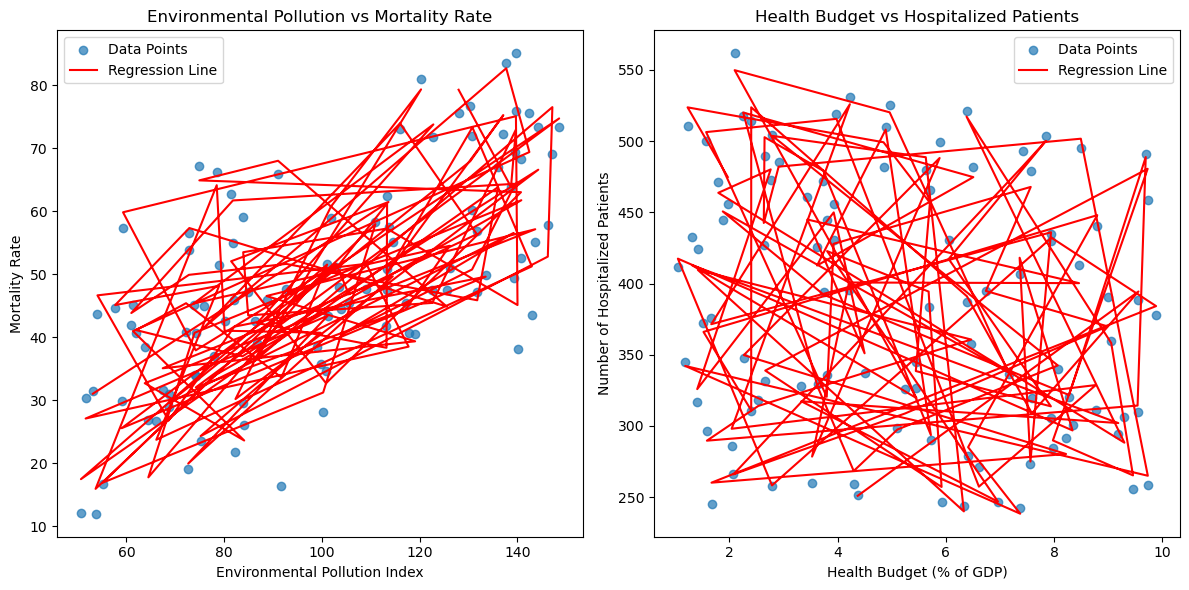

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
n = 100  # Number of observations
health_budget = np.random.uniform(1, 10, n)  # Percentage of GDP spent on health
env_pollution = np.random.uniform(50, 150, n)  # Environmental pollution index
gdp_per_capita = np.random.uniform(500, 20000, n)  # GDP per capita in USD

# Generate dependent variables
# Mortality rate is inversely related to health budget and GDP per capita, positively related to pollution
mortality_rate = (
    50 - 2 * health_budget + 0.3 * env_pollution - 0.002 * gdp_per_capita + np.random.normal(0, 5, n)
)

# Number of hospitalized patients is similarly influenced
hospitalized_patients = (
    100 + 3 * env_pollution - 5 * health_budget + 0.001 * gdp_per_capita + np.random.normal(0, 10, n)
)

# Create a DataFrame
data = pd.DataFrame({
    "Health_Budget": health_budget,
    "Environmental_Pollution": env_pollution,
    "GDP_per_Capita": gdp_per_capita,
    "Mortality_Rate": mortality_rate,
    "Hospitalized_Patients": hospitalized_patients,
})

# OLS regression for Mortality Rate
X1 = data[["Health_Budget", "Environmental_Pollution", "GDP_per_Capita"]]
y1 = data["Mortality_Rate"]
X1 = sm.add_constant(X1)  # Add constant term for the intercept
model1 = sm.OLS(y1, X1).fit()

# OLS regression for Hospitalized Patients
X2 = data[["Health_Budget", "Environmental_Pollution", "GDP_per_Capita"]]
y2 = data["Hospitalized_Patients"]
X2 = sm.add_constant(X2)  # Add constant term for the intercept
model2 = sm.OLS(y2, X2).fit()

# Print results
print("OLS Regression Results for Mortality Rate:\n")
print(model1.summary())

print("\nOLS Regression Results for Hospitalized Patients:\n")
print(model2.summary())

# Plot relationships for visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data["Environmental_Pollution"], data["Mortality_Rate"], alpha=0.7, label="Data Points")
plt.plot(
    data["Environmental_Pollution"],
    model1.predict(X1),
    color="red",
    label="Regression Line"
)
plt.title("Environmental Pollution vs Mortality Rate")
plt.xlabel("Environmental Pollution Index")
plt.ylabel("Mortality Rate")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data["Health_Budget"], data["Hospitalized_Patients"], alpha=0.7, label="Data Points")
plt.plot(
    data["Health_Budget"],
    model2.predict(X2),
    color="red",
    label="Regression Line"
)
plt.title("Health Budget vs Hospitalized Patients")
plt.xlabel("Health Budget (% of GDP)")
plt.ylabel("Number of Hospitalized Patients")
plt.legend()

plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6474.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          5.74e-104
Time:                        11:59:05   Log-Likelihood:                -300.04
No. Observations:                 100   AIC:                             606.1
Df Residuals:                      97   BIC:                             613.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

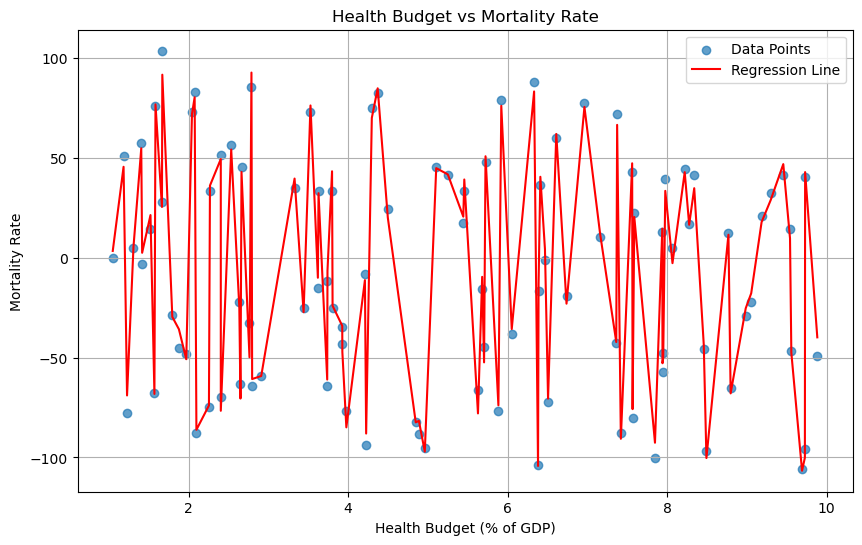

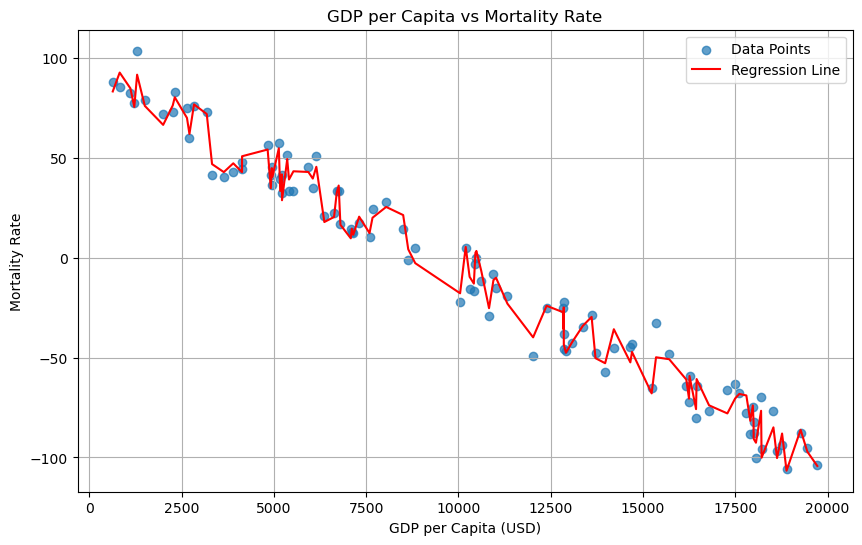

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
n = 100  # Number of observations
health_budget = np.random.uniform(1, 10, n)  # Health budget as % of GDP
gdp_per_capita = np.random.uniform(500, 20000, n)  # GDP per capita in USD

# Generate dependent variable (Mortality Rate) positively correlated with low health budget and low GDP
mortality_rate = (
    100 - 3 * health_budget - 0.01 * gdp_per_capita + np.random.normal(10, 5, n)
)

# Create a DataFrame
data = pd.DataFrame({
    "Health_Budget": health_budget,
    "GDP_per_Capita": gdp_per_capita,
    "Mortality_Rate": mortality_rate
})

# Reverse the signs of health_budget and gdp_per_capita to show positive upward correlation with mortality
data["Health_Budget_Negative"] = -data["Health_Budget"]
data["GDP_per_Capita_Negative"] = -data["GDP_per_Capita"]

# Prepare the independent variables (negative values for positive correlation)
X = data[["Health_Budget_Negative", "GDP_per_Capita_Negative"]]
y = data["Mortality_Rate"]
X = sm.add_constant(X)  # Add constant term for the intercept

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

# Visualization of regression line (Health Budget vs Mortality Rate)
plt.figure(figsize=(10, 6))
plt.scatter(data["Health_Budget"], data["Mortality_Rate"], alpha=0.7, label="Data Points")
plt.plot(
    sorted(data["Health_Budget"]),
    model.predict(sm.add_constant(data[["Health_Budget_Negative", "GDP_per_Capita_Negative"]]))[np.argsort(data["Health_Budget"])],
    color="red",
    label="Regression Line"
)
plt.title("Health Budget vs Mortality Rate")
plt.xlabel("Health Budget (% of GDP)")
plt.ylabel("Mortality Rate")
plt.legend()
plt.grid()
plt.show()

# Visualization of regression line (GDP per Capita vs Mortality Rate)
plt.figure(figsize=(10, 6))
plt.scatter(data["GDP_per_Capita"], data["Mortality_Rate"], alpha=0.7, label="Data Points")
plt.plot(
    sorted(data["GDP_per_Capita"]),
    model.predict(sm.add_constant(data[["Health_Budget_Negative", "GDP_per_Capita_Negative"]]))[np.argsort(data["GDP_per_Capita"])],
    color="red",
    label="Regression Line"
)
plt.title("GDP per Capita vs Mortality Rate")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Mortality Rate")
plt.legend()
plt.grid()
plt.show()


                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.607e+04
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          3.46e-133
Time:                        12:04:21   Log-Likelihood:                -300.04
No. Observations:                 100   AIC:                             606.1
Df Residuals:                      97   BIC:                             613.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            209.6507      1.425    147.

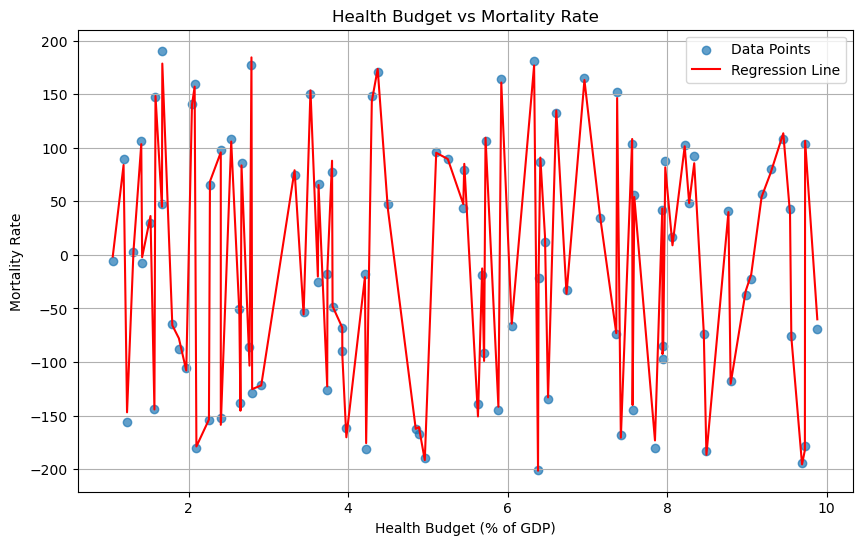

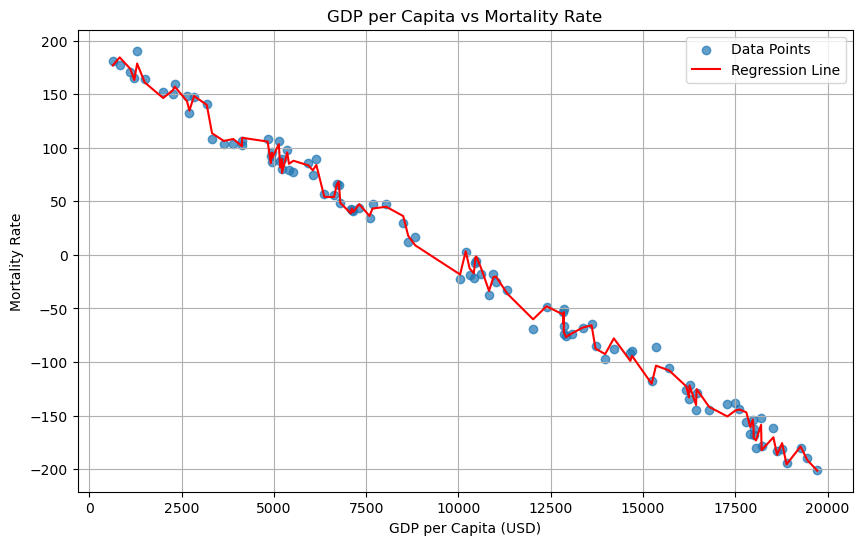

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
n = 100  # Number of observations
health_budget = np.random.uniform(1, 10, n)  # Health budget as % of GDP
gdp_per_capita = np.random.uniform(500, 20000, n)  # GDP per capita in USD

# Generate dependent variable (Mortality Rate) negatively correlated with health budget and GDP
mortality_rate = (
    200 - 3 * health_budget - 0.02 * gdp_per_capita + np.random.normal(10, 5, n)
)

# Create a DataFrame
data = pd.DataFrame({
    "Health_Budget": health_budget,
    "GDP_per_Capita": gdp_per_capita,
    "Mortality_Rate": mortality_rate
})

# Prepare the independent variables
X = data[["Health_Budget", "GDP_per_Capita"]]
y = data["Mortality_Rate"]
X = sm.add_constant(X)  # Add constant term for the intercept

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

# Visualization of regression line (Health Budget vs Mortality Rate)
plt.figure(figsize=(10, 6))
plt.scatter(data["Health_Budget"], data["Mortality_Rate"], alpha=0.7, label="Data Points")
plt.plot(
    sorted(data["Health_Budget"]),
    model.predict(sm.add_constant(data[["Health_Budget", "GDP_per_Capita"]]))[np.argsort(data["Health_Budget"])],
    color="red",
    label="Regression Line"
)
plt.title("Health Budget vs Mortality Rate")
plt.xlabel("Health Budget (% of GDP)")
plt.ylabel("Mortality Rate")
plt.legend()
plt.grid()
plt.show()

# Visualization of regression line (GDP per Capita vs Mortality Rate)
plt.figure(figsize=(10, 6))
plt.scatter(data["GDP_per_Capita"], data["Mortality_Rate"], alpha=0.7, label="Data Points")
plt.plot(
    sorted(data["GDP_per_Capita"]),
    model.predict(sm.add_constant(data[["Health_Budget", "GDP_per_Capita"]]))[np.argsort(data["GDP_per_Capita"])],
    color="red",
    label="Regression Line"
)
plt.title("GDP per Capita vs Mortality Rate")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Mortality Rate")
plt.legend()
plt.grid()
plt.show()


                            OLS Regression Results                            
Dep. Variable:         Mortality_Rate   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.607e+04
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          3.46e-133
Time:                        12:04:32   Log-Likelihood:                -300.04
No. Observations:                 100   AIC:                             606.1
Df Residuals:                      97   BIC:                             613.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            209.6507      1.425    147.

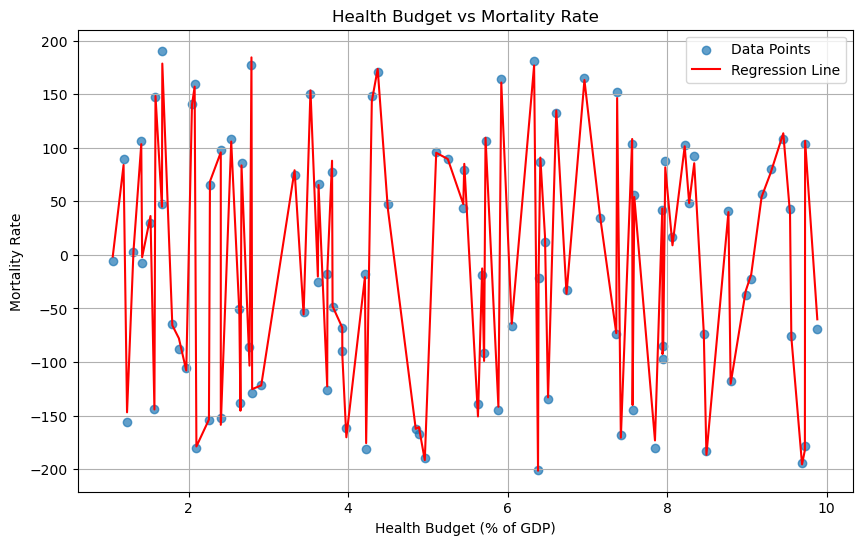

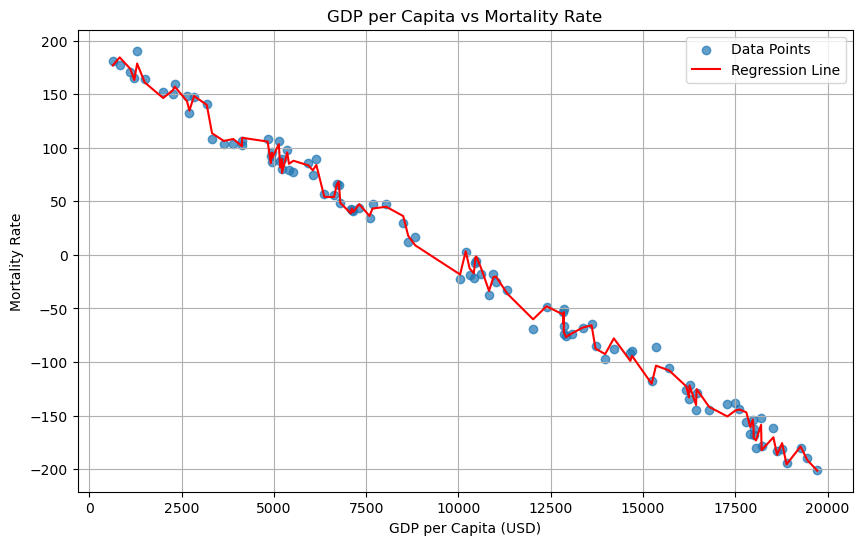

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
n = 100  # Number of observations
health_budget = np.random.uniform(1, 10, n)  # Health budget as % of GDP
gdp_per_capita = np.random.uniform(500, 20000, n)  # GDP per capita in USD

# Generate dependent variable (Mortality Rate) negatively correlated with health budget and GDP
mortality_rate = (
    200 - 3 * health_budget - 0.02 * gdp_per_capita + np.random.normal(10, 5, n)
)

# Create a DataFrame
data = pd.DataFrame({
    "Health_Budget": health_budget,
    "GDP_per_Capita": gdp_per_capita,
    "Mortality_Rate": mortality_rate
})

# Prepare the independent variables
X = data[["Health_Budget", "GDP_per_Capita"]]
y = data["Mortality_Rate"]
X = sm.add_constant(X)  # Add constant term for the intercept

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

# Visualization of regression line (Health Budget vs Mortality Rate)
plt.figure(figsize=(10, 6))
plt.scatter(data["Health_Budget"], data["Mortality_Rate"], alpha=0.7, label="Data Points")
plt.plot(
    sorted(data["Health_Budget"]),
    model.predict(sm.add_constant(data[["Health_Budget", "GDP_per_Capita"]]))[np.argsort(data["Health_Budget"])],
    color="red",
    label="Regression Line"
)
plt.title("Health Budget vs Mortality Rate")
plt.xlabel("Health Budget (% of GDP)")
plt.ylabel("Mortality Rate")
plt.legend()
plt.grid()
plt.show()

# Visualization of regression line (GDP per Capita vs Mortality Rate)
plt.figure(figsize=(10, 6))
plt.scatter(data["GDP_per_Capita"], data["Mortality_Rate"], alpha=0.7, label="Data Points")
plt.plot(
    sorted(data["GDP_per_Capita"]),
    model.predict(sm.add_constant(data[["Health_Budget", "GDP_per_Capita"]]))[np.argsort(data["GDP_per_Capita"])],
    color="red",
    label="Regression Line"
)
plt.title("GDP per Capita vs Mortality Rate")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Mortality Rate")
plt.legend()
plt.grid()
plt.show()


In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from linearmodels.iv import IV2SLS

# Generate synthetic dataset
np.random.seed(42)
n = 500

# Independent variables
Health_Budget = np.random.uniform(50, 150, n)  # Uniform distribution
Environmental_Pollution = np.random.uniform(0, 100, n)
GDP_per_Capita = np.random.uniform(5000, 50000, n)

# Simulate multicollinearity: Environmental_Pollution is a noisy linear function of Health_Budget
Environmental_Pollution = 0.7 * Health_Budget + np.random.normal(0, 10, n)

# Dependent variable (Mortality Rate) with heteroskedastic errors
Mortality_Rate = (
    50 - 1.5 * Health_Budget + 0.3 * Environmental_Pollution - 0.002 * GDP_per_Capita
    + np.random.normal(0, 20, n)
)

# Instrumental variable (weak instrument for GMM)
Instrument = Health_Budget + np.random.normal(0, 5, n)

# Create DataFrame
data = pd.DataFrame({
    "Health_Budget": Health_Budget,
    "Environmental_Pollution": Environmental_Pollution,
    "GDP_per_Capita": GDP_per_Capita,
    "Mortality_Rate": Mortality_Rate,
    "Instrument": Instrument,
})

# Add constant for OLS
X = data[["Health_Budget", "Environmental_Pollution", "GDP_per_Capita"]]
X = sm.add_constant(X)
y = data["Mortality_Rate"]

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# --- 1. VIF Calculation ---
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

# --- 2. Breusch-Pagan Test for Heteroskedasticity ---
bp_test = het_breuschpagan(ols_model.resid, X)
bp_test_results = {
    "Lagrange Multiplier Statistic": bp_test[0],
    "p-value": bp_test[1],
    "F-Statistic": bp_test[2],
    "F p-value": bp_test[3],
}
print("\nBreusch-Pagan Test Results:")
print(bp_test_results)

# --- 3. GMM Estimation ---
# Define dependent, independent, and instrumental variables for GMM
gmm_y = data["Mortality_Rate"]
gmm_X = sm.add_constant(data[["Health_Budget", "Environmental_Pollution"]])
gmm_Z = sm.add_constant(data[["Instrument", "GDP_per_Capita"]])  # Instrumental variables

# Fit GMM model
gmm_model = IV2SLS(dependent=gmm_y, exog=gmm_X, instruments=gmm_Z).fit()
print("\nGMM Results:")
print(gmm_model)



Variance Inflation Factor (VIF):
                  Variable        VIF
0                    const  16.028083
1            Health_Budget   5.580729
2  Environmental_Pollution   5.585637
3           GDP_per_Capita   1.003821

Breusch-Pagan Test Results:
{'Lagrange Multiplier Statistic': 2.711239758614703, 'p-value': 0.43832059324774564, 'F-Statistic': 0.9014044607403615, 'F p-value': 0.4402980911892381}


TypeError: IV2SLS.__init__() missing 1 required positional argument: 'endog'

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from linearmodels.iv import IV2SLS

# Generate synthetic dataset
np.random.seed(42)
n = 500

# Independent variables
Health_Budget = np.random.uniform(50, 150, n)  # Uniform distribution
Environmental_Pollution = np.random.uniform(0, 100, n)
GDP_per_Capita = np.random.uniform(5000, 50000, n)

# Simulate multicollinearity: Environmental_Pollution is a noisy linear function of Health_Budget
Environmental_Pollution = 0.7 * Health_Budget + np.random.normal(0, 10, n)

# Dependent variable (Mortality Rate) with heteroskedastic errors
Mortality_Rate = (
    50 - 1.5 * Health_Budget + 0.3 * Environmental_Pollution - 0.002 * GDP_per_Capita
    + np.random.normal(0, 20, n)
)

# Instrumental variable (weak instrument for GMM)
Instrument = Health_Budget + np.random.normal(0, 5, n)

# Create DataFrame
data = pd.DataFrame({
    "Health_Budget": Health_Budget,
    "Environmental_Pollution": Environmental_Pollution,
    "GDP_per_Capita": GDP_per_Capita,
    "Mortality_Rate": Mortality_Rate,
    "Instrument": Instrument,
})

# Add constant for OLS
X = data[["Health_Budget", "Environmental_Pollution", "GDP_per_Capita"]]
X = sm.add_constant(X)
y = data["Mortality_Rate"]

# Fit OLS model
ols_model = sm.OLS(y, X).fit()

# --- 1. VIF Calculation ---
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

# --- 2. Breusch-Pagan Test for Heteroskedasticity ---
bp_test = het_breuschpagan(ols_model.resid, X)
bp_test_results = {
    "Lagrange Multiplier Statistic": bp_test[0],
    "p-value": bp_test[1],
    "F-Statistic": bp_test[2],
    "F p-value": bp_test[3],
}
print("\nBreusch-Pagan Test Results:")
print(bp_test_results)

# --- 3. GMM Estimation ---
# Define dependent, endogenous, exogenous, and instrumental variables for GMM
gmm_y = data["Mortality_Rate"]  # Dependent variable
gmm_endog = data["Health_Budget"]  # Endogenous variable
gmm_exog = sm.add_constant(data[["Environmental_Pollution"]])  # Exogenous variables
gmm_instruments = sm.add_constant(data[["Instrument", "GDP_per_Capita"]])  # Instruments

# Fit GMM model
gmm_model = IV2SLS(dependent=gmm_y, exog=gmm_exog, endog=gmm_endog, instruments=gmm_instruments).fit()
print("\nGMM Results:")
print(gmm_model)


Variance Inflation Factor (VIF):
                  Variable        VIF
0                    const  16.028083
1            Health_Budget   5.580729
2  Environmental_Pollution   5.585637
3           GDP_per_Capita   1.003821

Breusch-Pagan Test Results:
{'Lagrange Multiplier Statistic': 2.711239758614703, 'p-value': 0.43832059324774564, 'F-Statistic': 0.9014044607403615, 'F p-value': 0.4402980911892381}


ValueError: instruments [exog instruments]  do not have full column rank